In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings ('ignore')
%matplotlib inline

# Dataset 1- Forest fires

In [3]:
df = pd.read_csv('forestfires (1).csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [6]:
df.shape

(517, 31)

In [7]:
df.info

<bound method DataFrame.info of     month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0

In [9]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.137044,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.176301,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.105642,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.162322,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.329648,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,-0.047714,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,0.269702,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.009752,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,0.001010,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,-0.019140,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671


<AxesSubplot:xlabel='month', ylabel='count'>

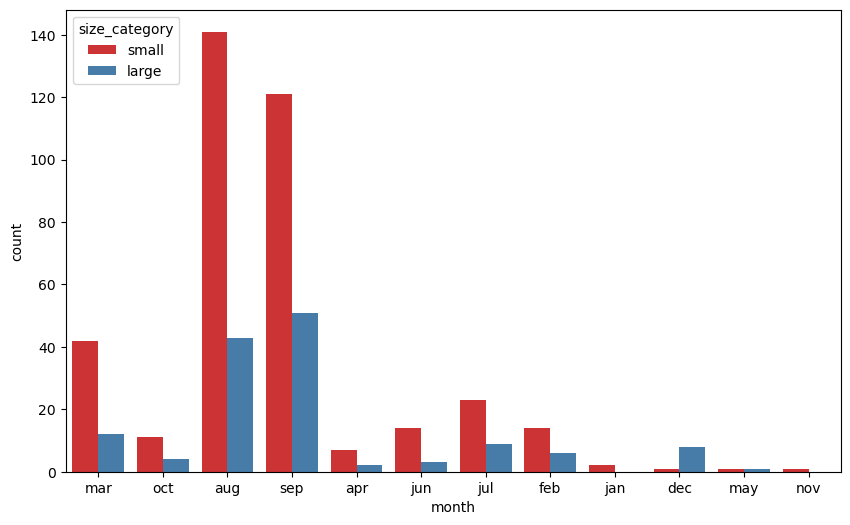

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'month', hue = 'size_category', data = df, palette='Set1')

<AxesSubplot:xlabel='day', ylabel='count'>

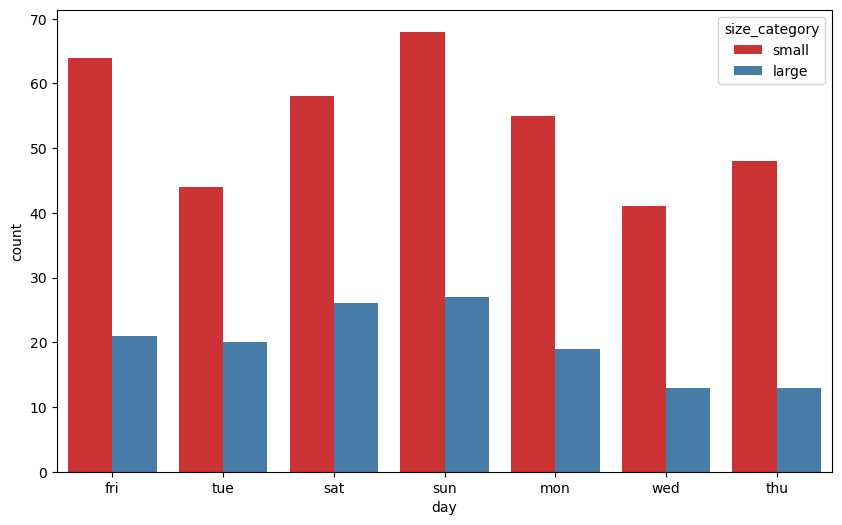

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'day', hue = 'size_category', data = df, palette='Set1')

In [16]:
label_encoder = preprocessing.LabelEncoder()

In [19]:
df["month"] = label_encoder.fit_transform(df["month"])
df["day"] = label_encoder.fit_transform(df["day"])
df["size_category"] = label_encoder.fit_transform(df["size_category"])

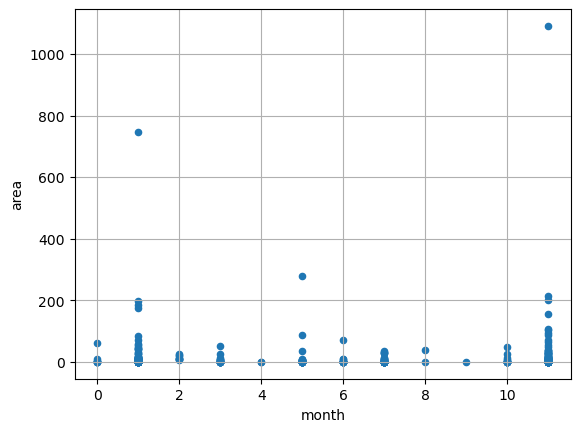

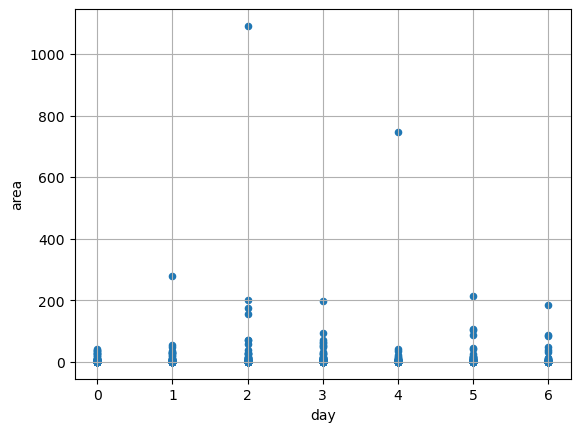

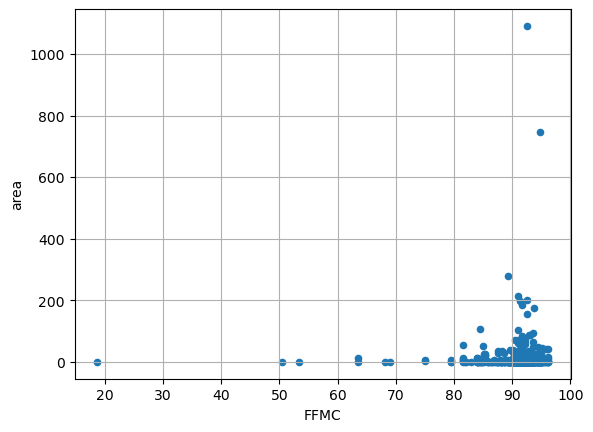

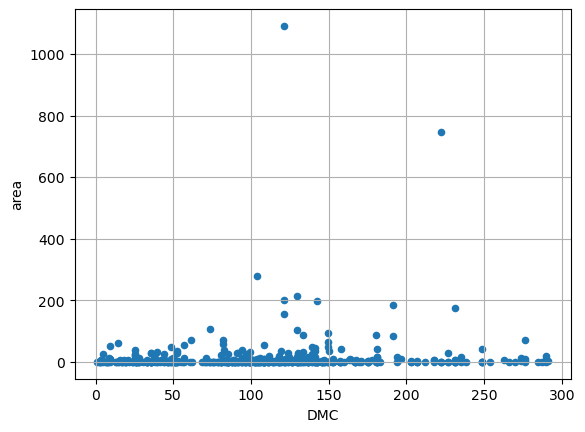

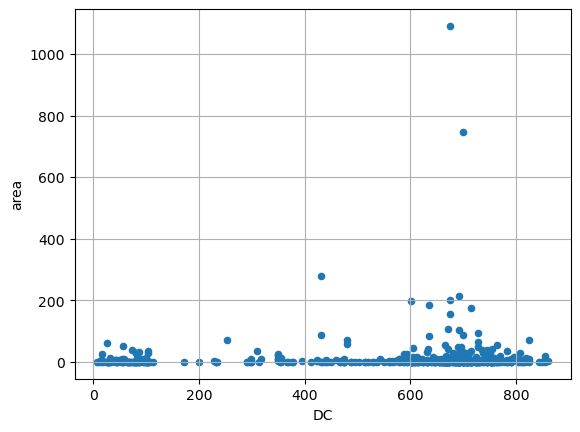

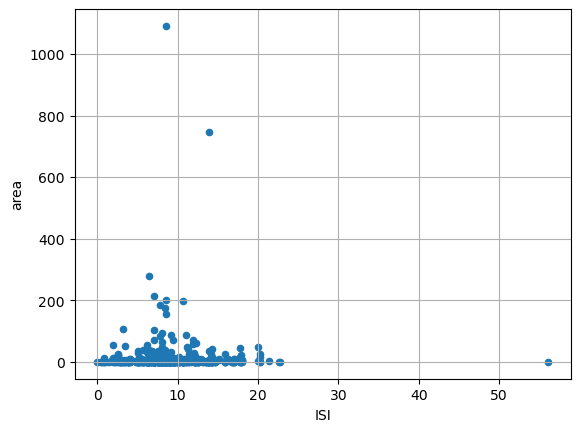

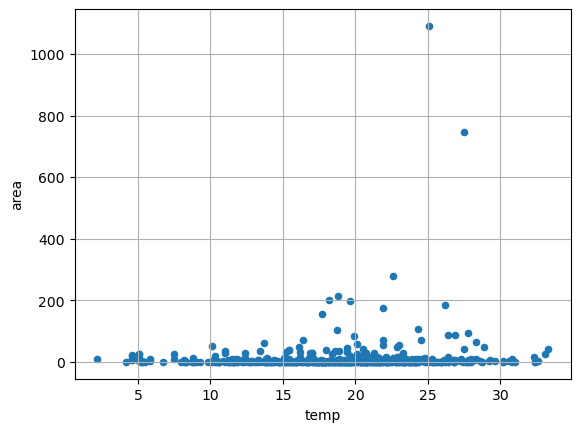

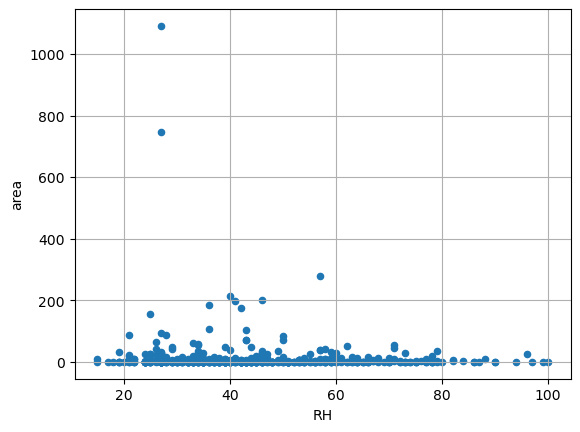

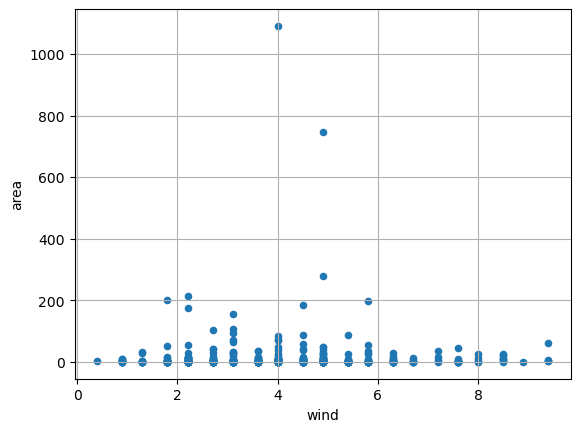

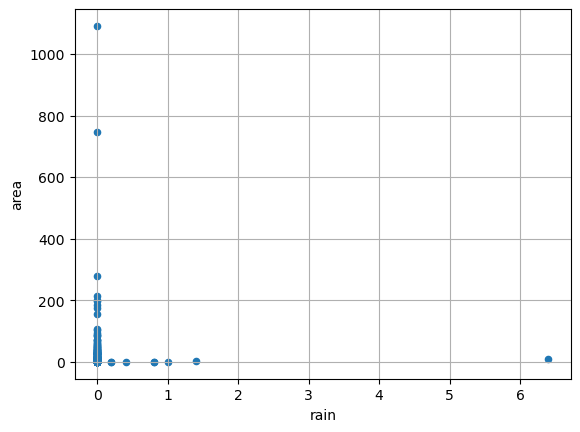

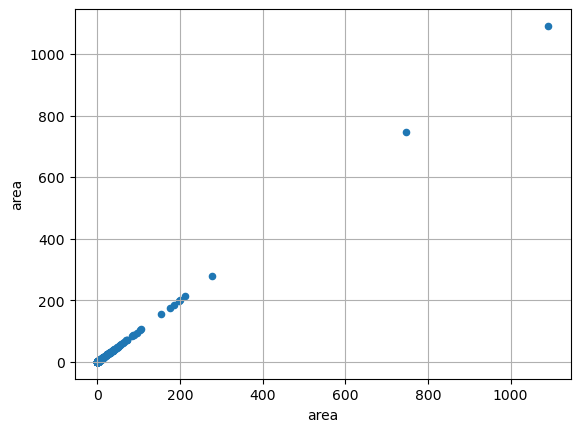

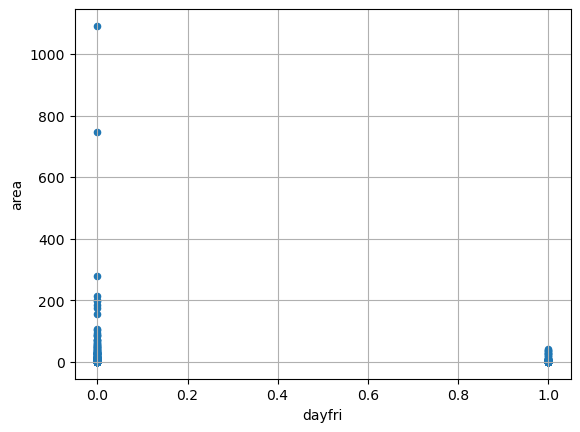

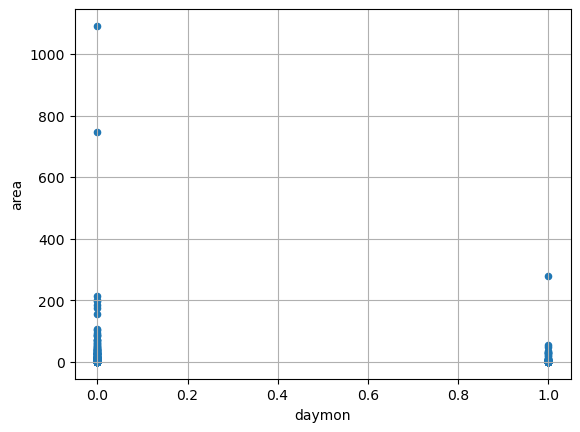

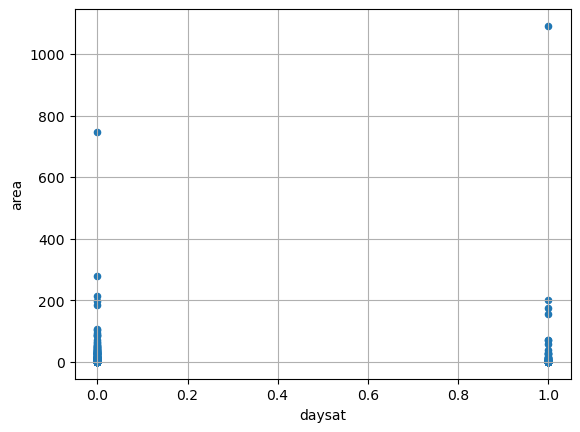

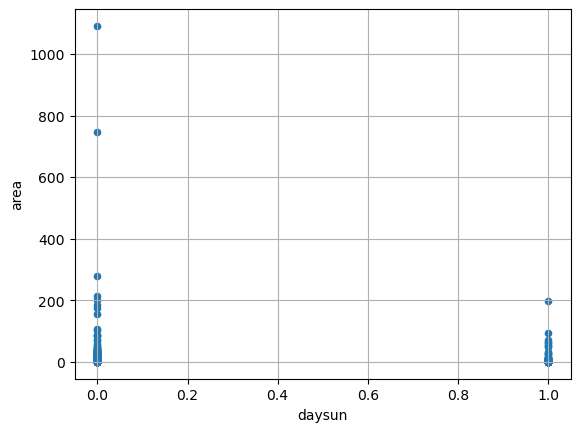

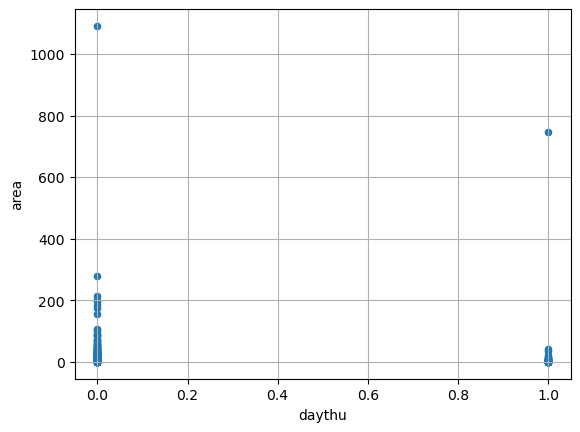

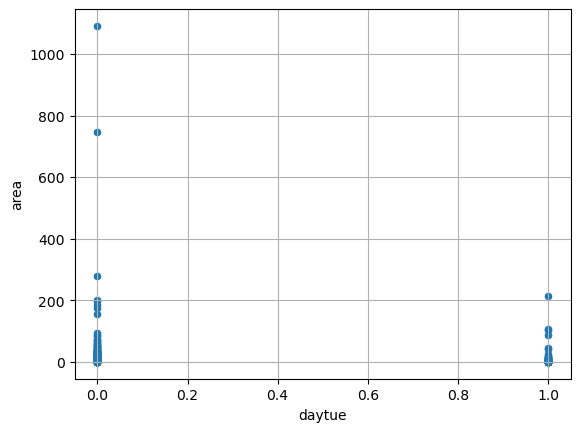

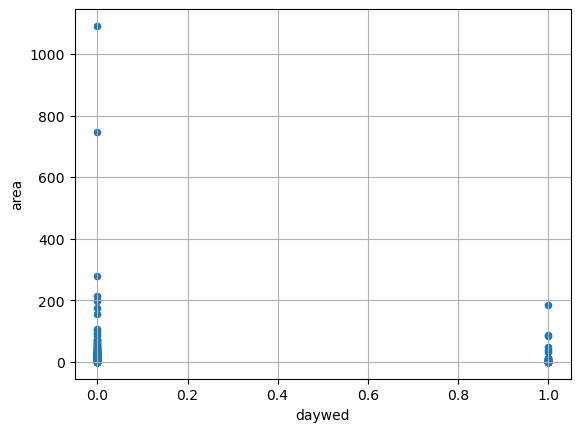

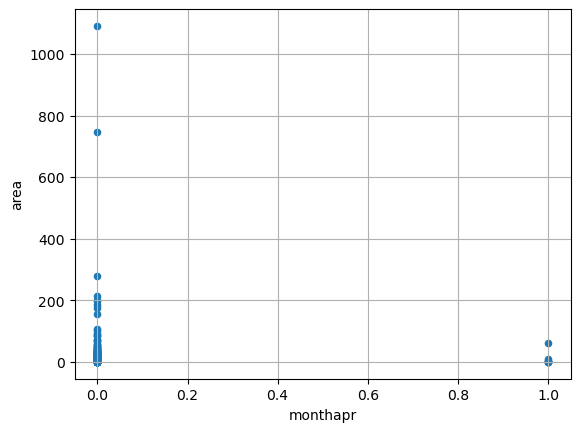

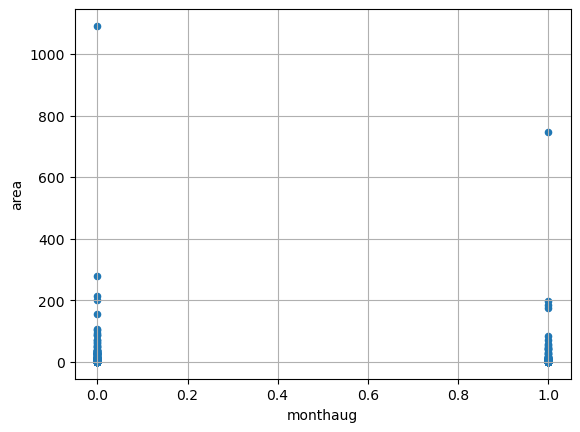

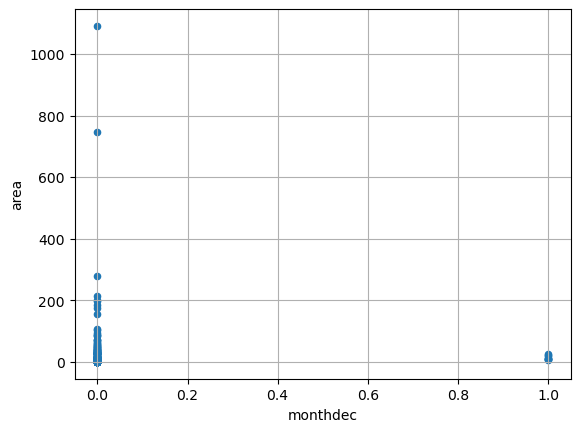

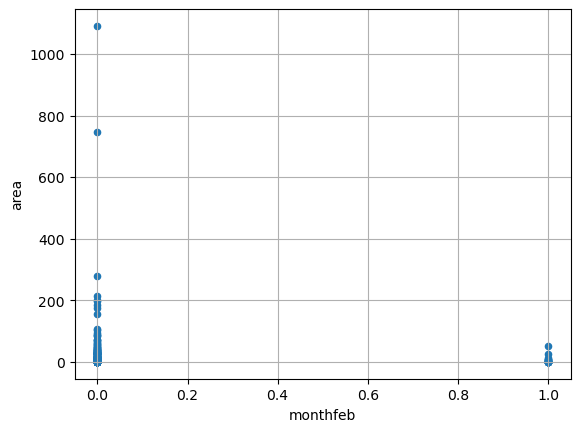

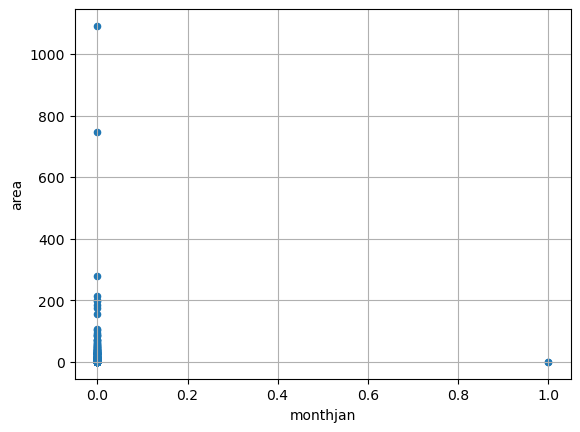

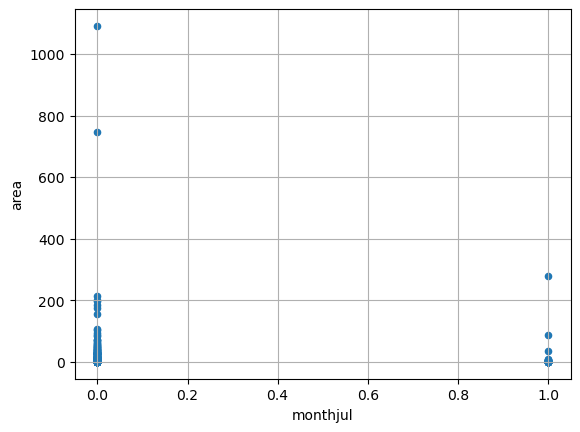

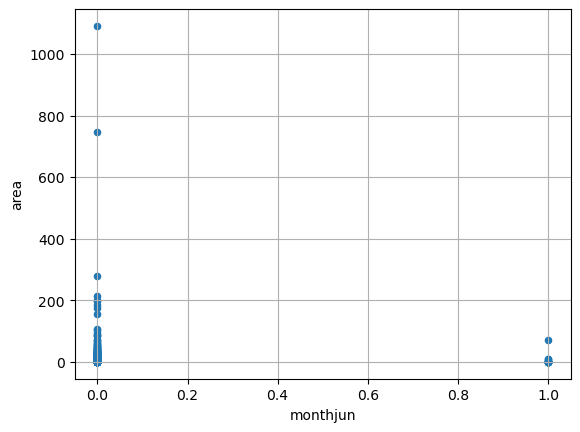

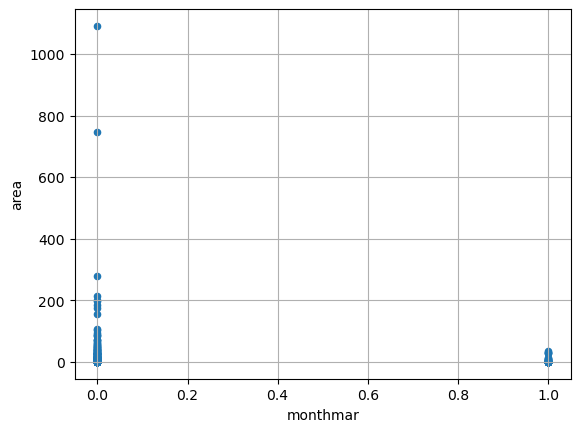

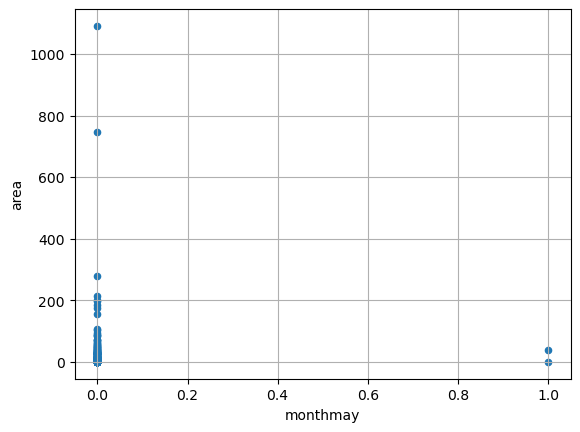

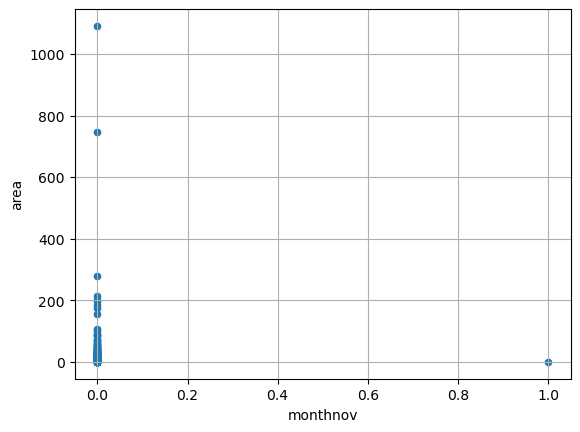

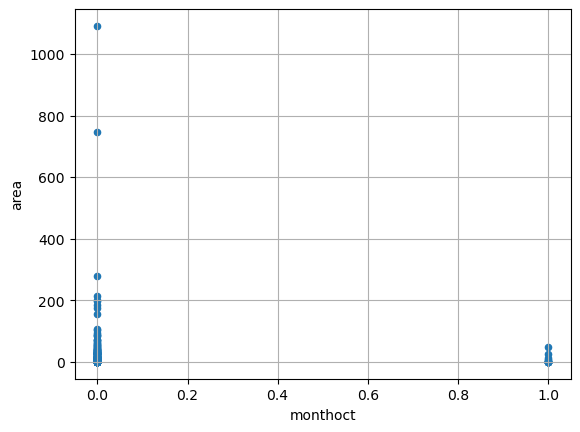

In [20]:
for i in df.describe().columns[:-2]:
    df.plot.scatter(i,'area',grid=True)

In [24]:
x = df.iloc[:,:11]
x

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [23]:
y=df["size_category"]
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((361, 11), (361,), (156, 11), (156,))

In [26]:
model = SVC()

model.fit(x_train, y_train)


SVC()

In [28]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [29]:
print(confusion_matrix(y_test, y_pred))

[[  1  43]
 [  0 112]]


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.02      0.04        44
           1       0.72      1.00      0.84       112

    accuracy                           0.72       156
   macro avg       0.86      0.51      0.44       156
weighted avg       0.80      0.72      0.61       156



In [33]:
param_grid = {'C' : [0.1, 1, 10, 100, 1000], 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001], 'kernel' : ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,  cv = 5)

In [34]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.740 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.736 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.736 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.736 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.736 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.740 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.736 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.736 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.736 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.736 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.740 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [35]:
grid.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [36]:
grid.best_estimator_

SVC(C=100, gamma=0.0001)

In [37]:
grid_pred = grid.predict(x_test)

In [38]:
grid_pred

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [39]:
print(confusion_matrix(y_test, grid_pred))

[[ 35   9]
 [  2 110]]


In [40]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.95      0.80      0.86        44
           1       0.92      0.98      0.95       112

    accuracy                           0.93       156
   macro avg       0.94      0.89      0.91       156
weighted avg       0.93      0.93      0.93       156



In [41]:
# Inference
#So, using grid search method, we improved our model accuracy.

# Dataset 2- Salary data

In [4]:
train =pd.read_csv("SalaryData_Train (1).csv")

In [5]:
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
test = pd.read_csv("SalaryData_Test (1).csv")

In [7]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [47]:
train.shape

(30161, 14)

In [48]:
test.shape

(2890, 14)

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [50]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            2890 non-null   int64  
 1   workclass      2890 non-null   object 
 2   education      2889 non-null   object 
 3   educationno    2889 non-null   float64
 4   maritalstatus  2889 non-null   object 
 5   occupation     2889 non-null   object 
 6   relationship   2889 non-null   object 
 7   race           2889 non-null   object 
 8   sex            2889 non-null   object 
 9   capitalgain    2889 non-null   float64
 10  capitalloss    2889 non-null   float64
 11  hoursperweek   2889 non-null   float64
 12  native         2889 non-null   object 
 13  Salary         2889 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 316.2+ KB


In [51]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [52]:
test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,2890.000000,2889.000000,2889.000000,2889.000000,2889.000000
mean,38.500692,10.104881,1291.977501,91.753548,40.919003
std,13.263557,2.621112,8433.059674,411.915824,12.037439
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3004.000000,99.000000


In [54]:
train.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.043525,0.080152,0.060278,0.101598
educationno,0.043525,1.000000,0.124416,0.079691,0.152522
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000


In [55]:
test.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.003952,0.079924,0.058932,0.087651
educationno,0.003952,1.000000,0.137596,0.102726,0.140720
capitalgain,0.079924,0.137596,1.000000,-0.034138,0.094212
capitalloss,0.058932,0.102726,-0.034138,1.000000,0.053149
hoursperweek,0.087651,0.140720,0.094212,0.053149,1.000000


In [57]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [58]:
train["workclass"] = lb.fit_transform(train["workclass"])
train["education"] = lb.fit_transform(train["education"])
train["maritalstatus"] = lb.fit_transform(train["maritalstatus"])
train["occupation"] = lb.fit_transform(train["occupation"])
train["relationship"] = lb.fit_transform(train["relationship"])
train["race"] = lb.fit_transform(train["race"])
train["sex"] = lb.fit_transform(train["sex"])
train["native"] = lb.fit_transform(train["native"])
train["Salary"] = lb.fit_transform(train["Salary"])

In [59]:
test["workclass"] = lb.fit_transform(test["workclass"])
test["education"] = lb.fit_transform(test["education"])
test["maritalstatus"] = lb.fit_transform(test["maritalstatus"])
test["occupation"] = lb.fit_transform(test["occupation"])
test["relationship"] = lb.fit_transform(test["relationship"])
test["race"] = lb.fit_transform(test["race"])
test["sex"] = lb.fit_transform(test["sex"])
test["native"] = lb.fit_transform(test["native"])
test["Salary"] = lb.fit_transform(test["Salary"])

In [60]:
train = train.iloc[: 2000, :]
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            2000 non-null   int64
 1   workclass      2000 non-null   int32
 2   education      2000 non-null   int32
 3   educationno    2000 non-null   int64
 4   maritalstatus  2000 non-null   int32
 5   occupation     2000 non-null   int32
 6   relationship   2000 non-null   int32
 7   race           2000 non-null   int32
 8   sex            2000 non-null   int32
 9   capitalgain    2000 non-null   int64
 10  capitalloss    2000 non-null   int64
 11  hoursperweek   2000 non-null   int64
 12  native         2000 non-null   int32
 13  Salary         2000 non-null   int32
dtypes: int32(9), int64(5)
memory usage: 148.6 KB


In [61]:
test = test.iloc[: 1300, :]
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1300 non-null   int64  
 1   workclass      1300 non-null   int32  
 2   education      1300 non-null   int32  
 3   educationno    1300 non-null   float64
 4   maritalstatus  1300 non-null   int32  
 5   occupation     1300 non-null   int32  
 6   relationship   1300 non-null   int32  
 7   race           1300 non-null   int32  
 8   sex            1300 non-null   int32  
 9   capitalgain    1300 non-null   float64
 10  capitalloss    1300 non-null   float64
 11  hoursperweek   1300 non-null   float64
 12  native         1300 non-null   int32  
 13  Salary         1300 non-null   int32  
dtypes: float64(4), int32(9), int64(1)
memory usage: 96.6 KB


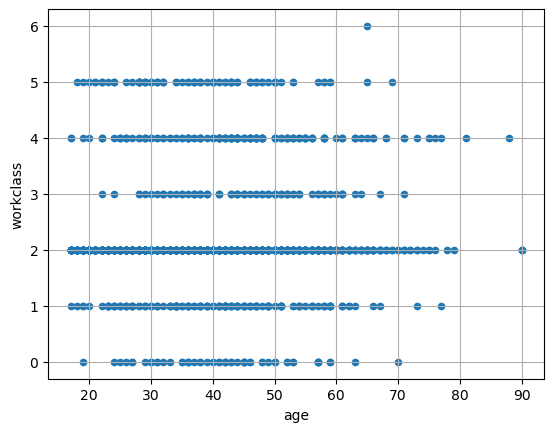

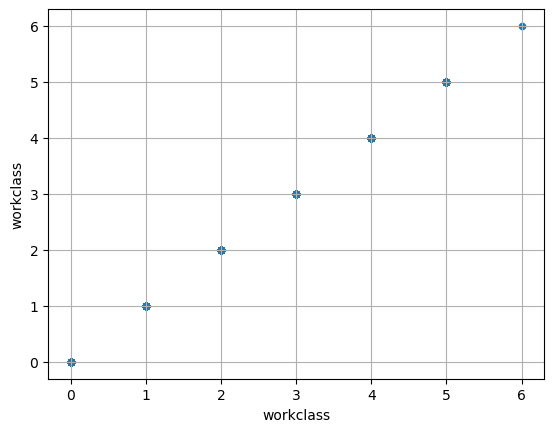

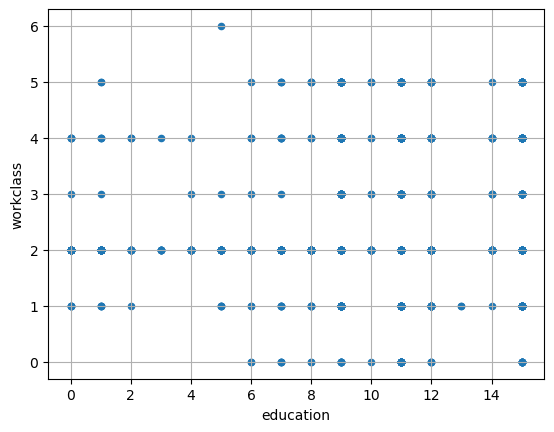

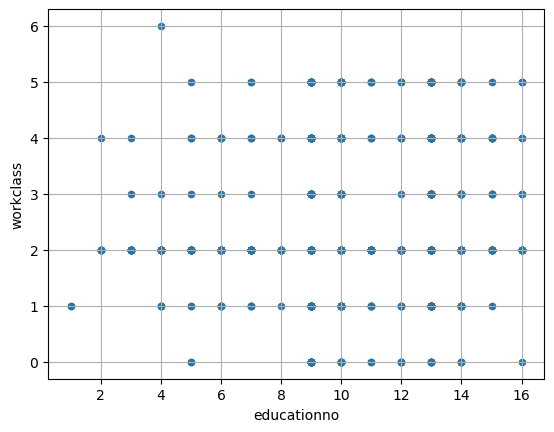

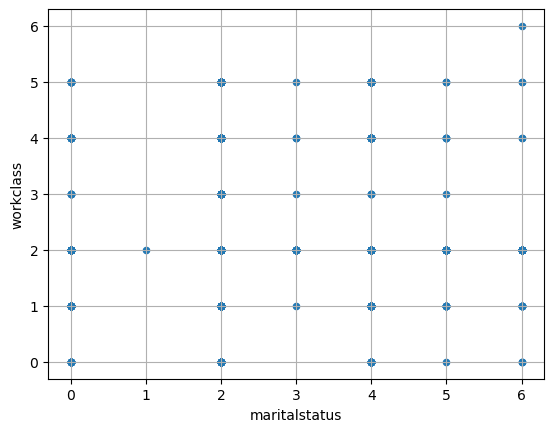

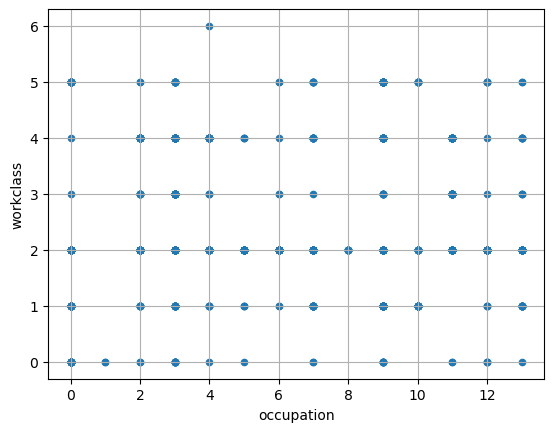

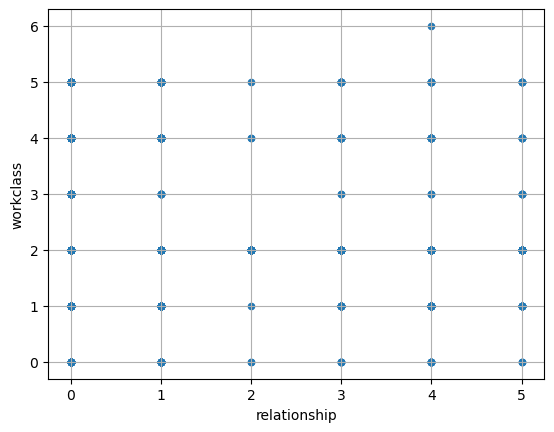

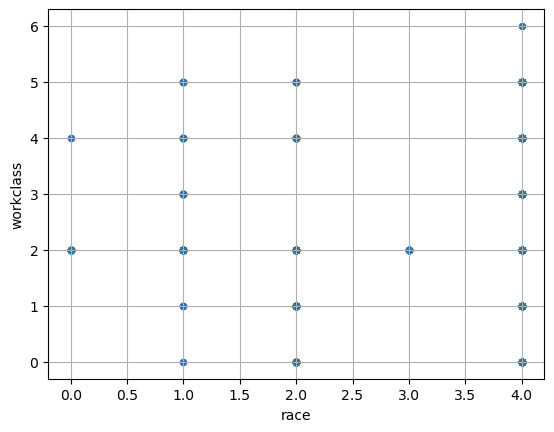

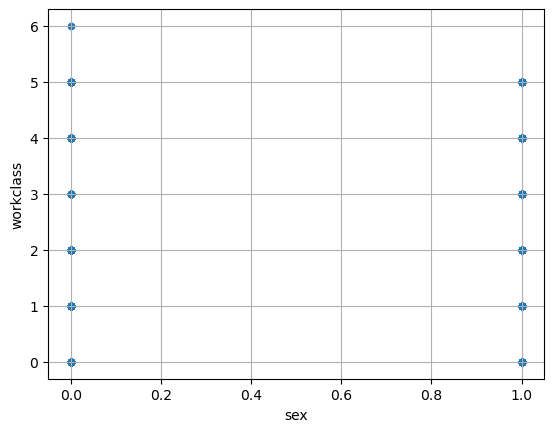

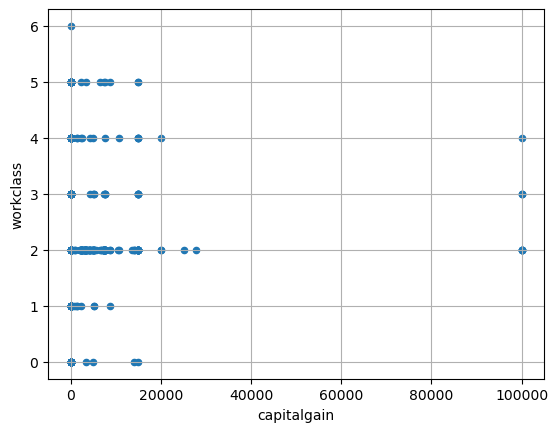

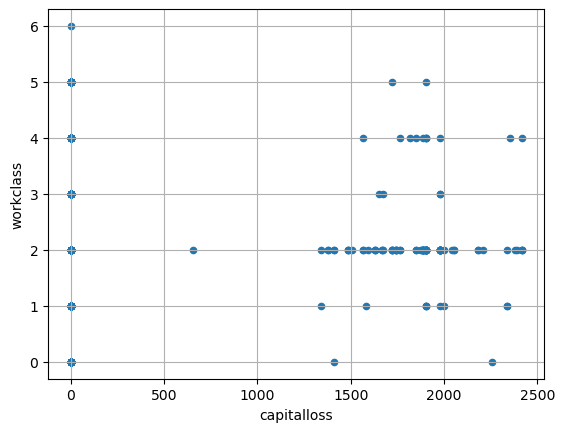

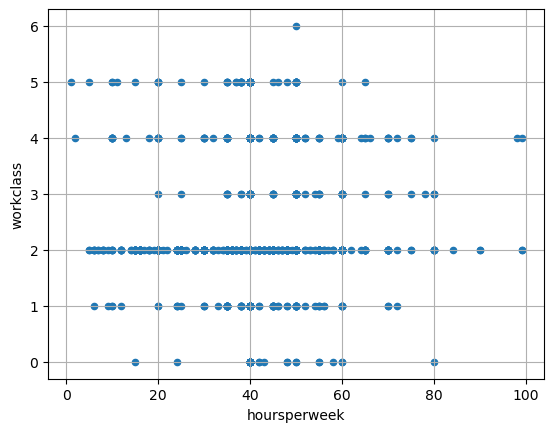

In [62]:
for i in train.describe().columns[:-2]:
    train.plot.scatter(i,'workclass',grid=True)

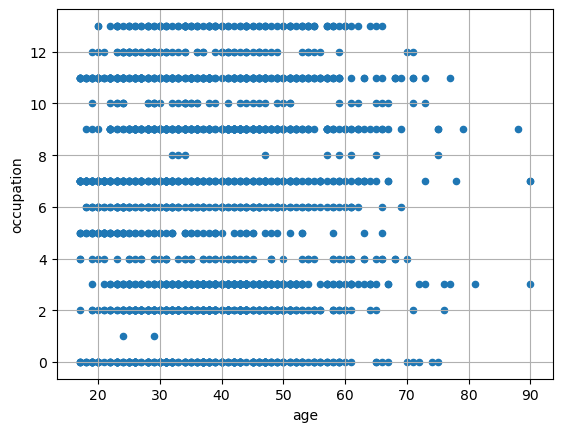

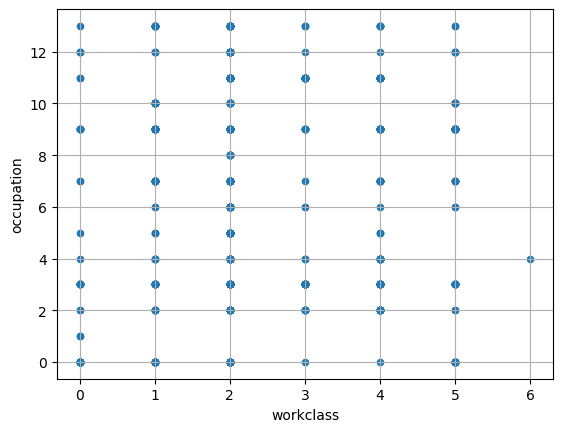

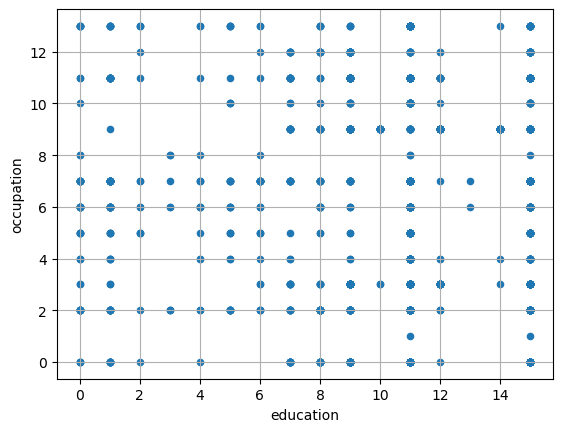

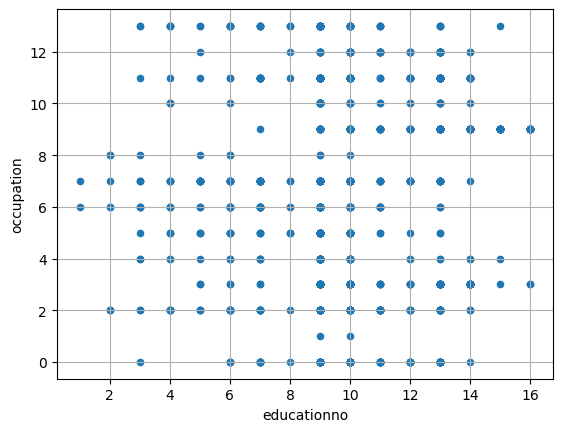

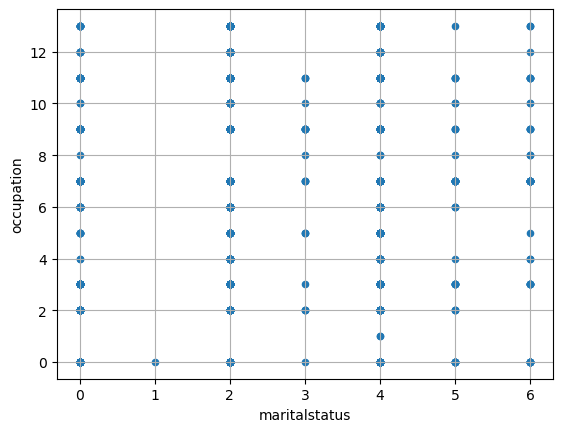

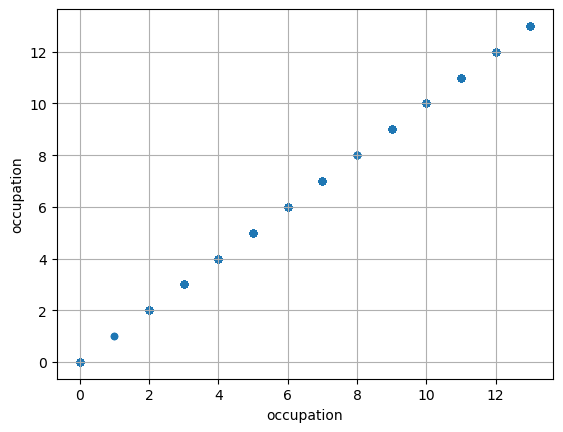

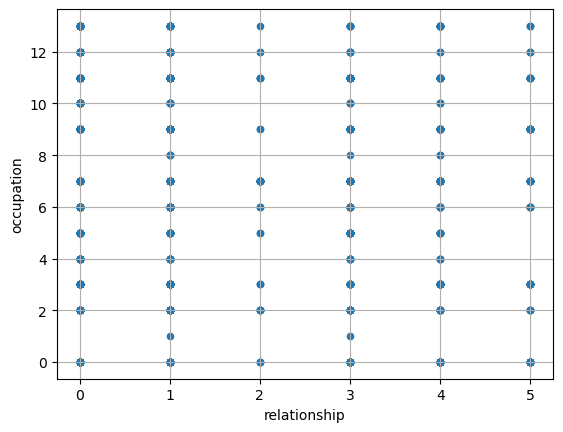

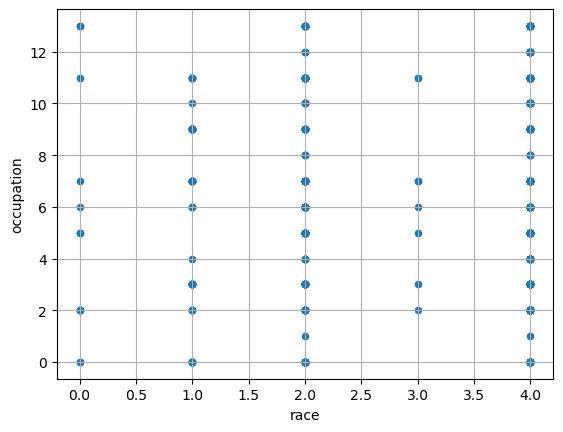

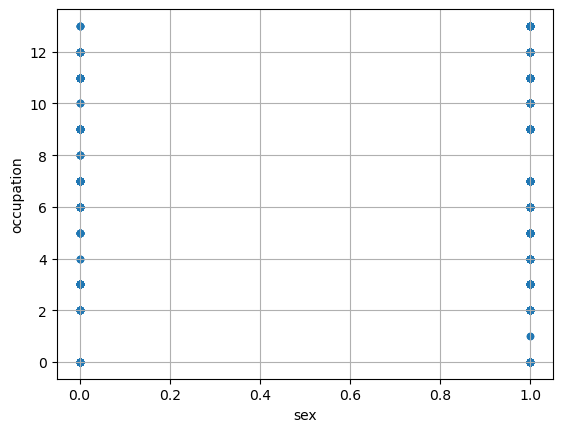

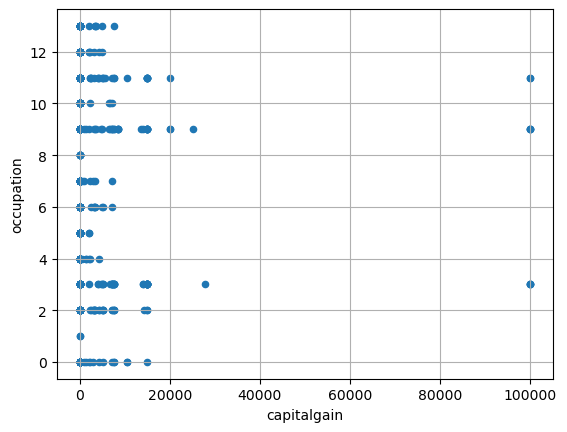

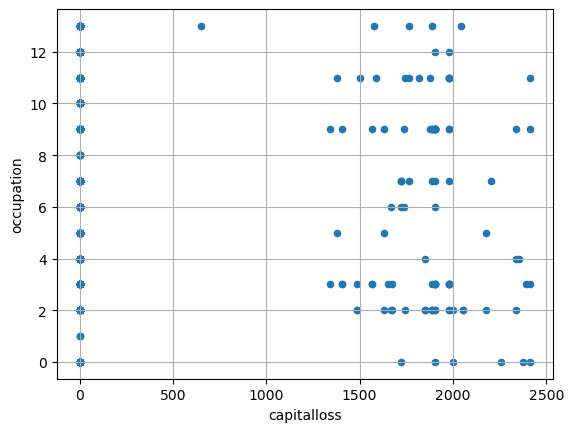

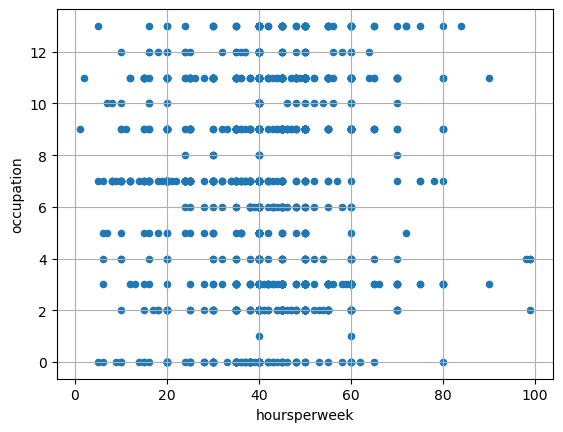

In [63]:
for i in train.describe().columns[:-2]:
    train.plot.scatter(i,'occupation',grid=True)

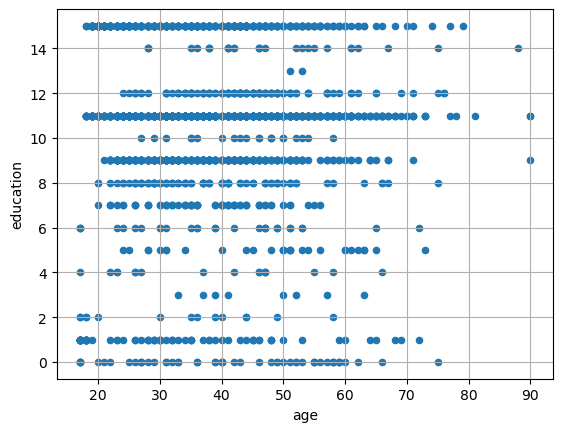

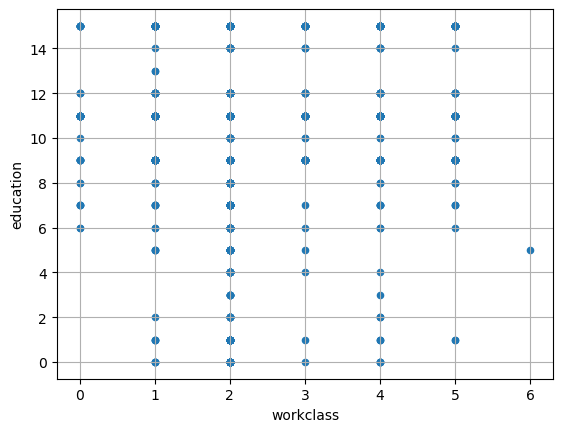

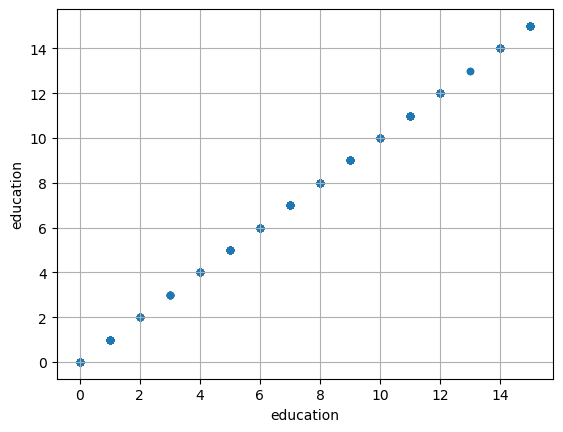

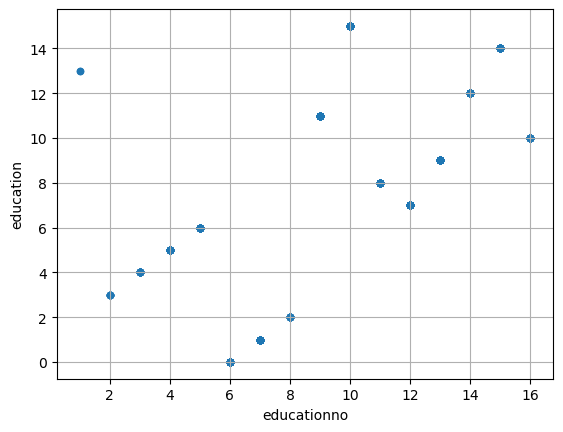

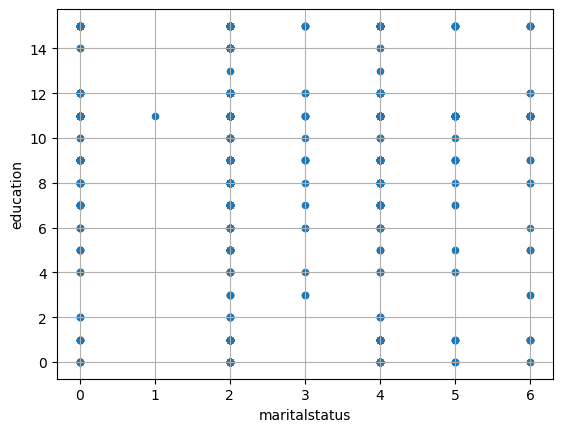

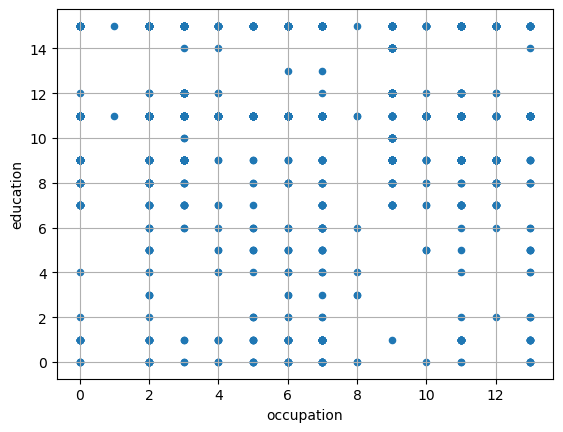

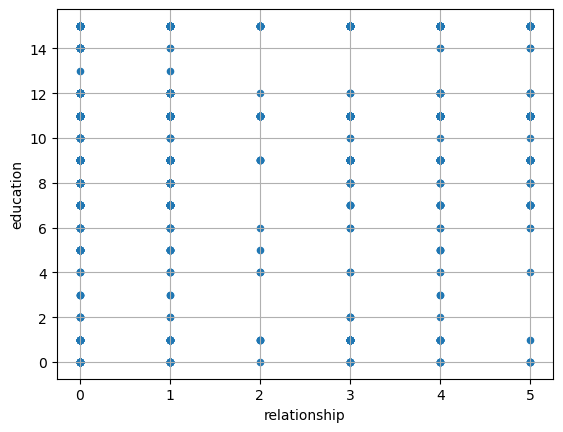

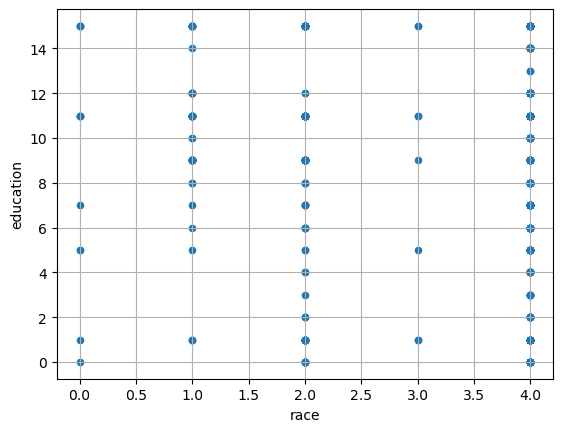

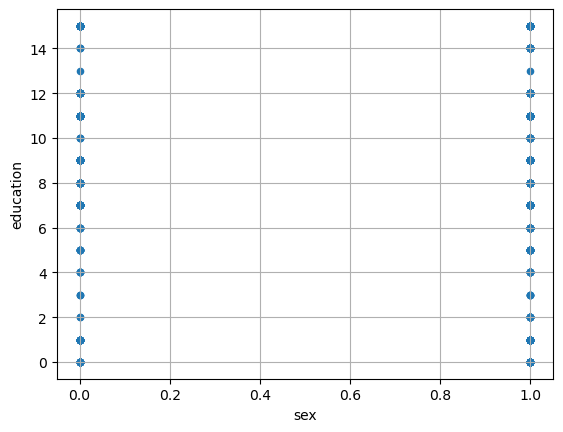

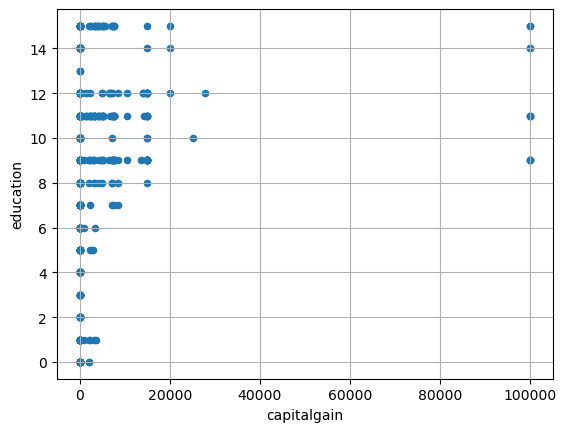

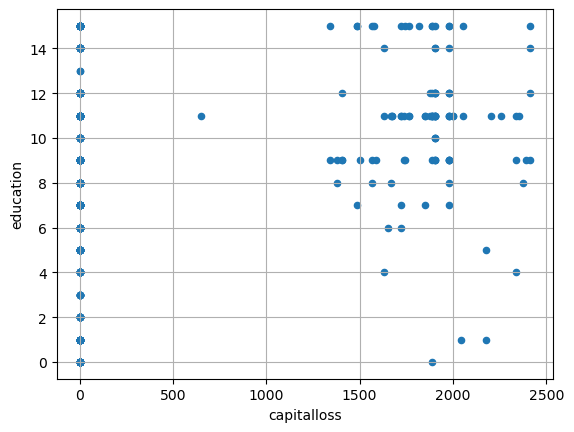

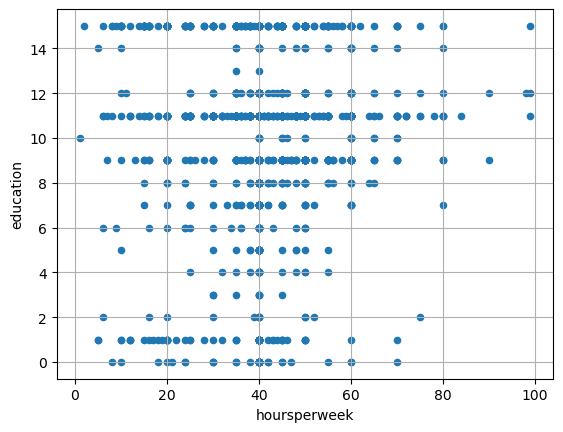

In [64]:
for i in train.describe().columns[:-2]:
    train.plot.scatter(i,'education',grid=True)

In [65]:
train.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.080136,-0.004007,0.014781,-0.249467,-0.004634,-0.216588,0.015168,0.050730,0.081112,0.058997,0.114429,-0.001914,0.231176
workclass,0.080136,1.000000,0.029167,0.068866,-0.043219,0.033209,-0.074186,0.074418,0.087332,0.038314,-0.003069,0.031221,-0.036263,0.064561
education,-0.004007,0.029167,1.000000,0.328746,-0.047668,-0.028564,-0.033833,0.031098,-0.004879,0.035363,0.012082,0.060470,0.085718,0.051282
educationno,0.014781,0.068866,0.328746,1.000000,-0.062303,0.098459,-0.091217,0.075867,0.034123,0.095804,0.062601,0.172302,0.057602,0.308324
maritalstatus,-0.249467,-0.043219,-0.047668,-0.062303,1.000000,0.075036,0.157226,-0.083280,-0.078456,-0.044395,-0.016550,-0.187437,0.002006,-0.199289
occupation,-0.004634,0.033209,-0.028564,0.098459,0.075036,1.000000,-0.065478,0.035830,0.072483,0.016453,-0.015165,0.032509,-0.000106,0.026793
relationship,-0.216588,-0.074186,-0.033833,-0.091217,0.157226,-0.065478,1.000000,-0.100663,-0.557999,-0.052849,-0.042243,-0.256052,-0.054397,-0.211663
race,0.015168,0.074418,0.031098,0.075867,-0.083280,0.035830,-0.100663,1.000000,0.076281,0.018565,0.043238,0.065593,0.155655,0.068448
sex,0.050730,0.087332,-0.004879,0.034123,-0.078456,0.072483,-0.557999,0.076281,1.000000,0.030977,0.049696,0.205762,0.029781,0.182859
capitalgain,0.081112,0.038314,0.035363,0.095804,-0.044395,0.016453,-0.052849,0.018565,0.030977,1.000000,-0.033968,0.064462,-0.028919,0.220183


In [66]:
test.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.102636,-0.058456,-0.028238,-0.299098,-0.035747,-0.253358,0.003103,0.074865,0.107361,0.057418,0.106105,0.017997,0.226220
workclass,0.102636,1.000000,0.061501,0.031098,-0.050045,0.009414,-0.073461,0.064186,0.050752,0.055405,0.059100,0.069768,0.038219,0.063227
education,-0.058456,0.061501,1.000000,0.409201,-0.039852,-0.023030,-0.024427,-0.005501,-0.011597,0.060160,0.038734,0.063598,0.066668,0.119016
educationno,-0.028238,0.031098,0.409201,1.000000,-0.091147,0.077972,-0.050679,0.072135,-0.011529,0.170971,0.111713,0.145317,0.100318,0.313422
maritalstatus,-0.299098,-0.050045,-0.039852,-0.091147,1.000000,-0.012545,0.197796,-0.085572,-0.147099,-0.071843,-0.018926,-0.161722,0.006078,-0.226209
occupation,-0.035747,0.009414,-0.023030,0.077972,-0.012545,1.000000,-0.063657,0.037160,0.073262,0.004247,-0.038230,0.018785,0.003071,0.018910
relationship,-0.253358,-0.073461,-0.024427,-0.050679,0.197796,-0.063657,1.000000,-0.158517,-0.588370,-0.060524,-0.037262,-0.298815,0.014831,-0.259728
race,0.003103,0.064186,-0.005501,0.072135,-0.085572,0.037160,-0.158517,1.000000,0.072954,0.017319,0.064287,0.058017,0.159607,0.076017
sex,0.074865,0.050752,-0.011597,-0.011529,-0.147099,0.073262,-0.588370,0.072954,1.000000,0.070784,0.053486,0.233998,-0.037154,0.206553
capitalgain,0.107361,0.055405,0.060160,0.170971,-0.071843,0.004247,-0.060524,0.017319,0.070784,1.000000,-0.036077,0.128418,0.031754,0.249281


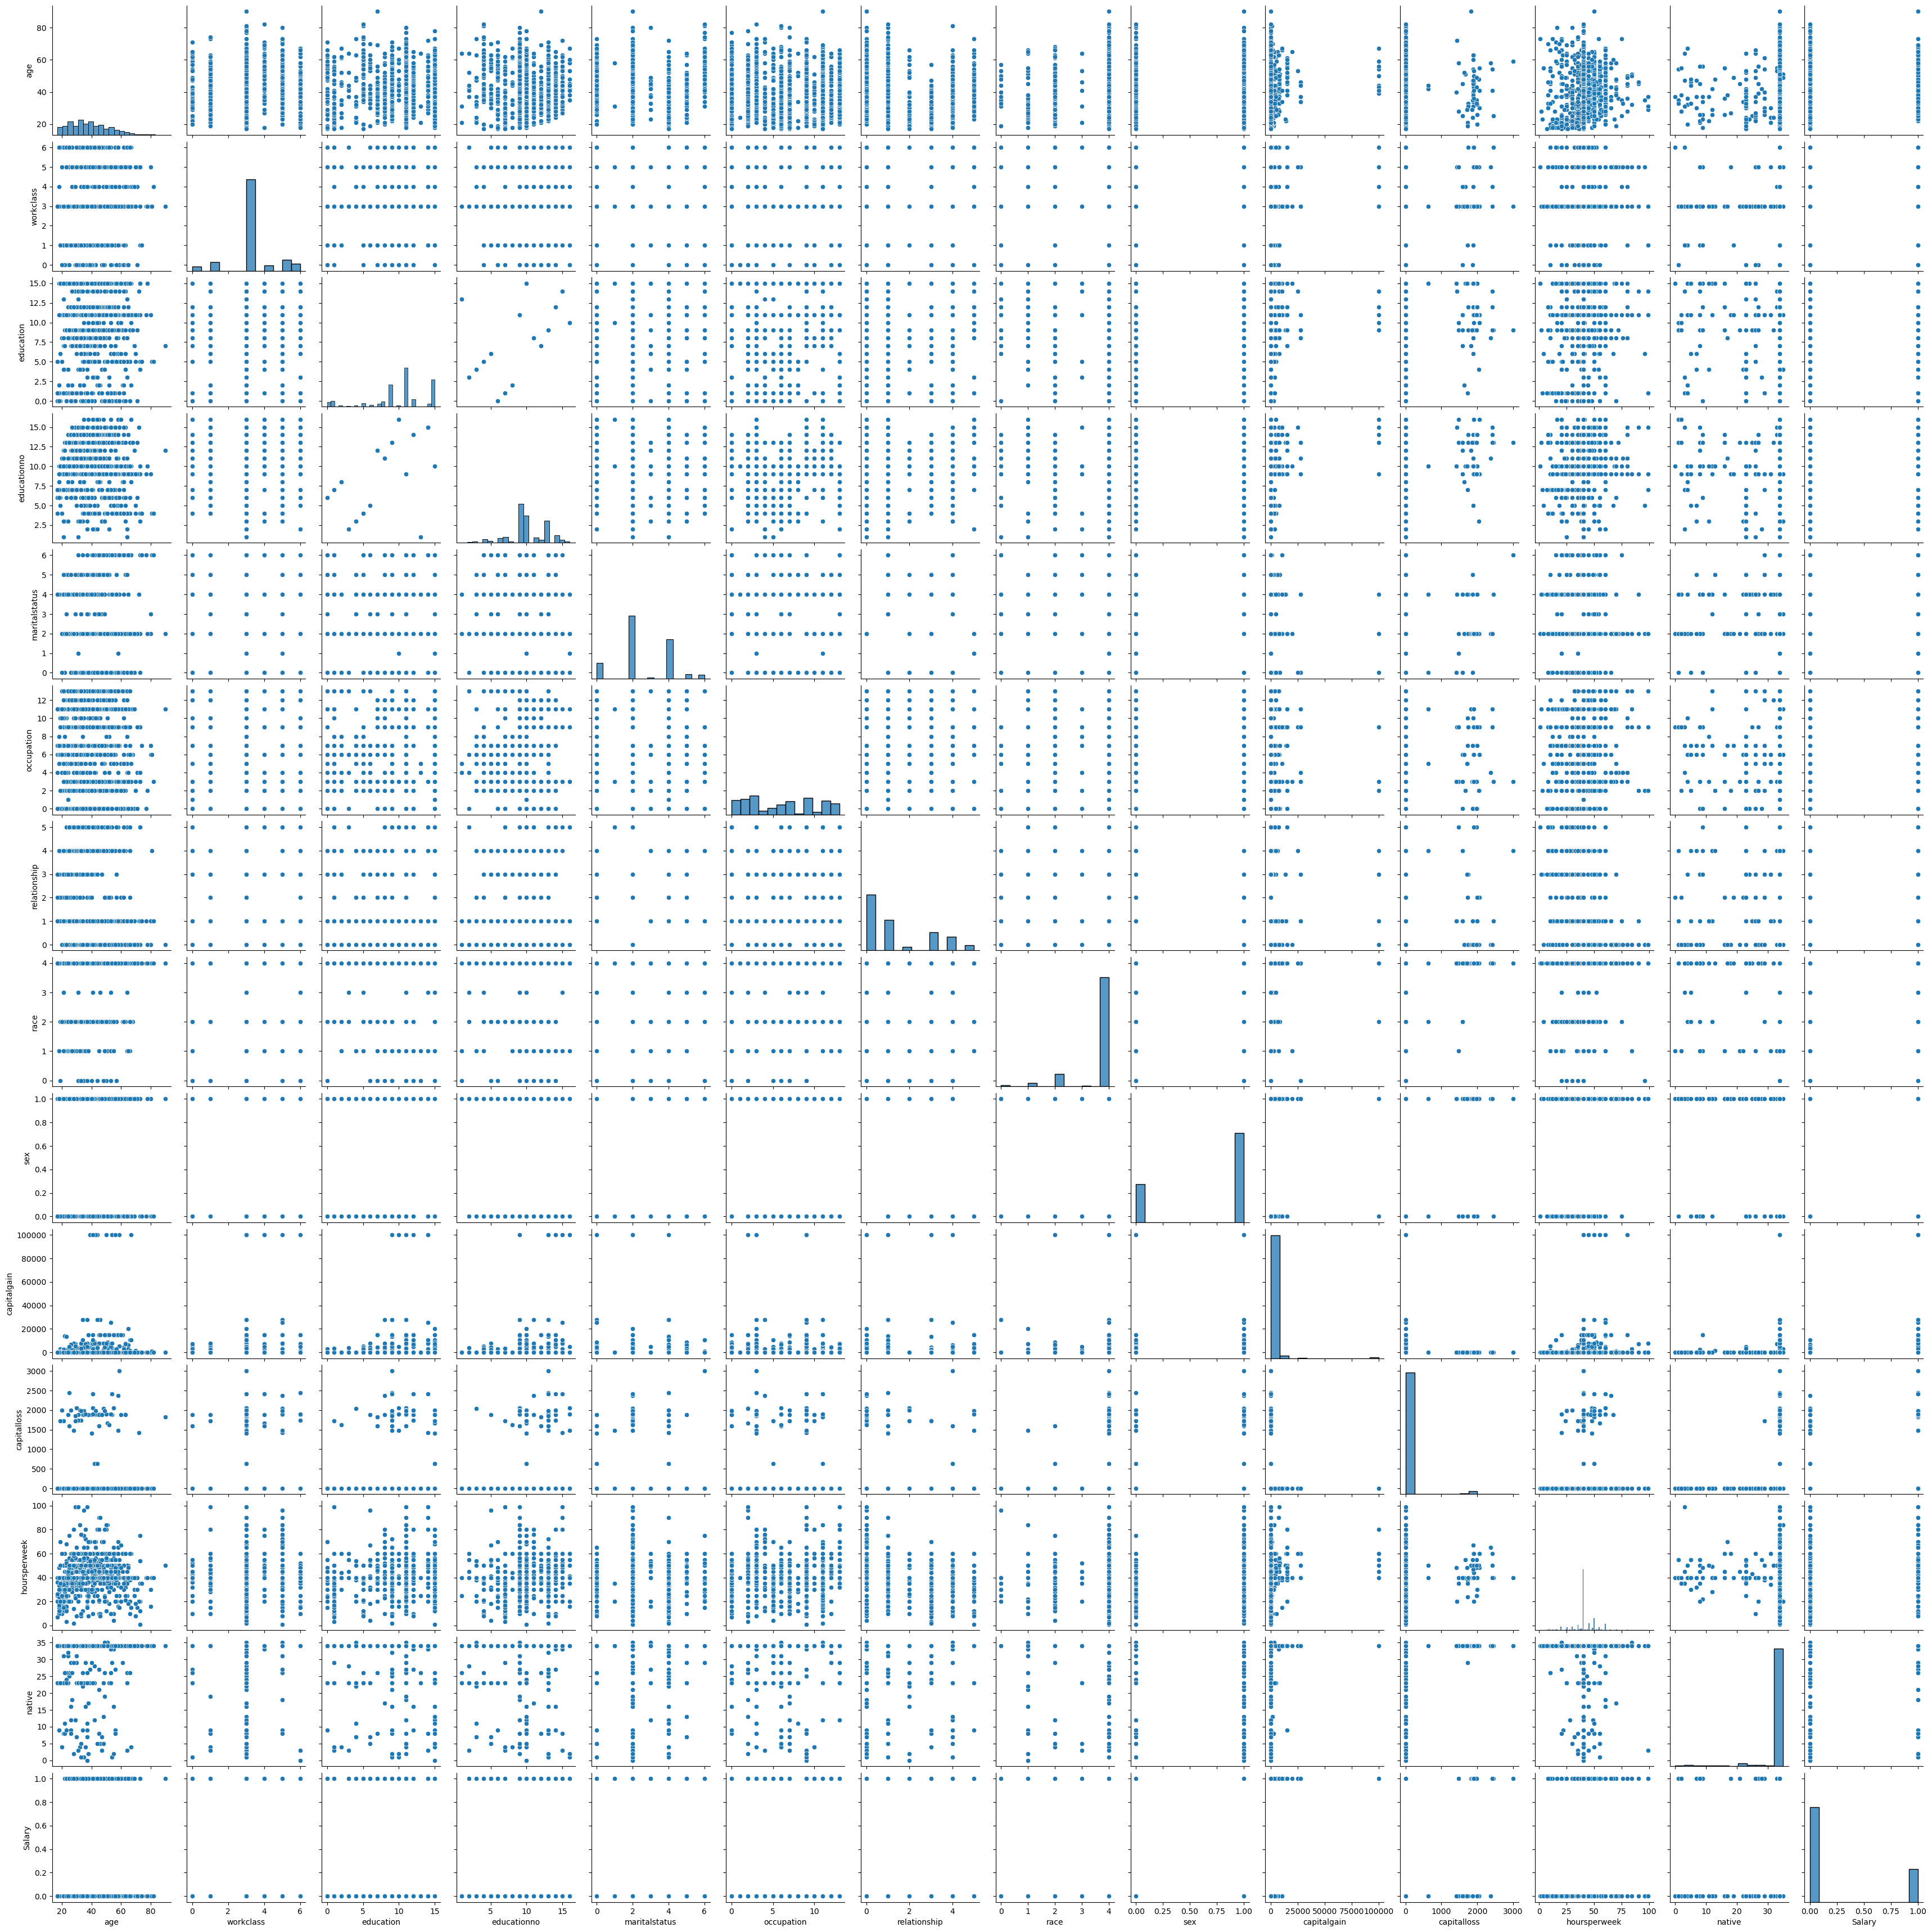

In [67]:
sns.pairplot(test)

In [68]:
X_train=train.iloc[:,:-1]
X_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,33,2,11,9,5,10,3,4,0,0,0,40,37
1996,41,2,11,9,2,6,0,4,1,0,0,40,37
1997,51,2,6,5,2,13,0,4,1,0,0,40,37
1998,42,2,11,9,2,11,0,4,1,0,0,48,37


In [69]:
y_train=train.iloc[:,-1]
y_train

0       0
1       0
2       0
3       0
4       0
       ..
1995    0
1996    0
1997    0
1998    0
1999    1
Name: Salary, Length: 2000, dtype: int32

In [70]:
X_test=test.iloc[:,:-1]
X_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,3,1,7.0,4,6,3,2,1,0.0,0.0,40.0,34
1,38,3,11,9.0,2,4,0,4,1,0.0,0.0,50.0,34
2,28,1,7,12.0,2,10,0,4,1,0.0,0.0,40.0,34
3,44,3,15,10.0,2,6,0,2,1,7688.0,0.0,40.0,34
4,34,3,0,6.0,4,7,1,4,1,0.0,0.0,30.0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,66,5,15,10.0,2,13,0,2,1,0.0,0.0,60.0,34
1296,40,3,15,10.0,4,2,2,0,1,0.0,0.0,30.0,34
1297,37,3,4,3.0,2,6,0,4,1,0.0,0.0,40.0,7
1298,34,3,9,13.0,2,11,0,4,1,0.0,0.0,40.0,34


In [71]:
y_test = test.iloc[:,-1]
y_test

0       0
1       0
2       1
3       1
4       0
       ..
1295    0
1296    0
1297    0
1298    0
1299    0
Name: Salary, Length: 1300, dtype: int32

In [72]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2000, 13), (2000,), (1300, 13), (1300,))

In [73]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [74]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [75]:
print(confusion_matrix(y_test, y_pred))

[[961   5]
 [267  67]]


In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.99      0.88       966
           1       0.93      0.20      0.33       334

    accuracy                           0.79      1300
   macro avg       0.86      0.60      0.60      1300
weighted avg       0.82      0.79      0.74      1300



In [77]:
param_grid = {'C' : [1, 5, 10, 15, 20], 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001], 'kernel' : ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,  cv = 5)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.752 total time=   0.3s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.750 total time=   0.4s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.745 total time=   0.3s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.745 total time=   0.3s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.743 total time=   0.3s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.748 total time=   0.3s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.738 total time=   0.3s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.738 total time=   0.3s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.755 total time=   0.2s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.748 total time=   0.3s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.775 total time=   0.1s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 15, 20],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [78]:
grid.best_params_

{'C': 15, 'gamma': 0.001, 'kernel': 'rbf'}

In [79]:
grid_pred = grid.predict(X_test)

In [80]:
grid_pred

array([0, 0, 0, ..., 0, 0, 0])

In [81]:
print(confusion_matrix(y_test, grid_pred))

[[944  22]
 [204 130]]


In [82]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89       966
           1       0.86      0.39      0.53       334

    accuracy                           0.83      1300
   macro avg       0.84      0.68      0.71      1300
weighted avg       0.83      0.83      0.80      1300



In [83]:
# Inference
#So, using grid search method, we improved our model accuracy from 0.79 to 0.83